In [1]:
#Description: This program uses the dual moving averages crossover to determine whenb to buy and when to sell stock

In [4]:
#Import liberies 
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [5]:
#load the data
df= yf.Ticker('AAPL').history(start='2006-10-2',end='2011-12-30')
df=df.reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-10-02,2.290100,2.313580,2.265704,2.282781,712639200,0,0
1,2006-10-03,2.270279,2.285525,2.231856,2.258995,790708800,0,0
2,2006-10-04,2.259606,2.301077,2.230941,2.298638,829082800,0,0
3,2006-10-05,2.272719,2.322423,2.260521,2.281866,683883200,0,0
4,2006-10-06,2.269363,2.288270,2.250762,2.263264,466958800,0,0
...,...,...,...,...,...,...,...,...
1317,2011-12-22,12.106115,12.171068,12.078671,12.153381,202358800,0,0
1318,2011-12-23,12.188147,12.307074,12.182048,12.299146,269399200,0,0
1319,2011-12-27,12.292131,12.474789,12.289690,12.396725,265076000,0,0
1320,2011-12-28,12.407704,12.449176,12.238462,12.278105,228662000,0,0


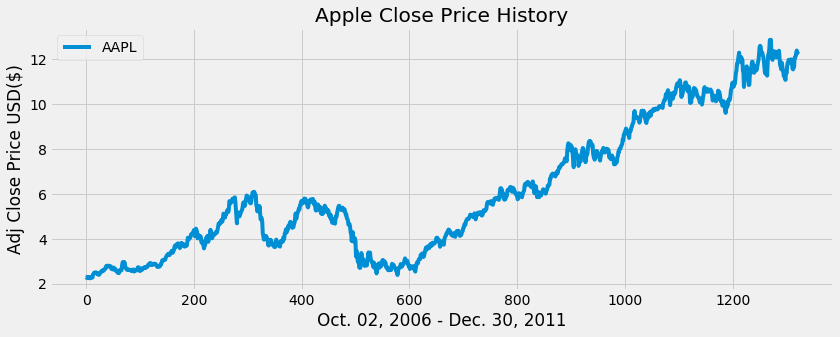

In [8]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Close'],label='AAPL')
plt.title('Apple Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [11]:
#Create the simple Moving Average with a 30 day Window
SMA30=pd.DataFrame()
SMA30['Close Price']=df['Close'].rolling(window=30).mean()
SMA30

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1317,11.701126
1318,11.719534
1319,11.741805
1320,11.765570


In [12]:
#Create a simple moving average 
SMA100=pd.DataFrame()
SMA100['Close Price']=df['Close'].rolling(window=100).mean()
SMA100

,Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1317,11.823776
1318,11.827057
1319,11.835949
1320,11.844798


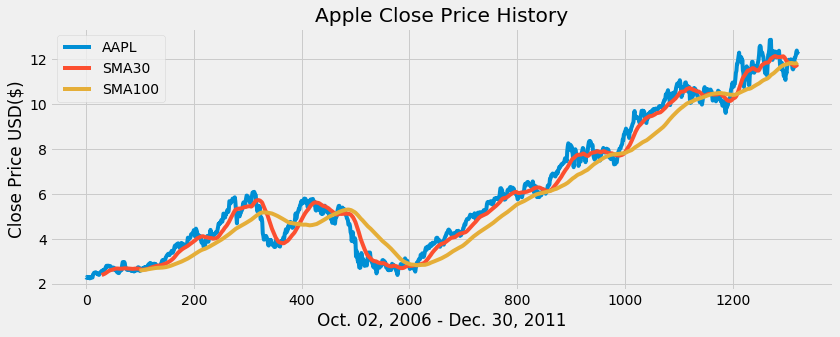

In [13]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Close'],label='AAPL')
plt.plot(SMA30['Close Price'],label='SMA30')
plt.plot(SMA100['Close Price'],label='SMA100')
plt.title('Apple Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [16]:
#Create a new Data freame to store all the data
data=pd.DataFrame()
data['AAPL']=df['Close']
data['SMA30']=SMA30['Close Price']
data['SMA100']=SMA100['Close Price']
data

,AAPL,SMA30,SMA100
0,2.282781,NaN,NaN
1,2.258995,NaN,NaN
2,2.298638,NaN,NaN
3,2.281866,NaN,NaN
4,2.263264,NaN,NaN
...,...,...,...
1317,12.153381,11.701126,11.823776
1318,12.299146,11.719534,11.827057
1319,12.396725,11.741805,11.835949
1320,12.278105,11.765570,11.844798


In [49]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
    sigPriceBuy=[]
    sigPricesell=[]
    flag=-1
    for i in range(len(data)):
        if data['SMA30'][i] < data['SMA100'][i] and flag != 1:
            sigPriceBuy.append(data['AAPL'][i])
            sigPricesell.append(np.nan)
            flag=1
        elif data['SMA30'][i] > data['SMA100'][i] and flag != 0:
            sigPriceBuy.append(np.nan)
            sigPricesell.append(data['AAPL'][i])
            flag=0
        else:
            sigPriceBuy.append(np.nan)
            sigPricesell.append(np.nan)
            
    return(sigPriceBuy,sigPricesell)

        

In [50]:
Buy_sell=buy_sell(data)
data['Buy_signal_price']=Buy_sell[0]
data['Sell_signal_price']=Buy_sell[1]

In [51]:
data

,AAPL,SMA30,SMA100,Buy_signal_price,Sell_signal_price
0,2.282781,NaN,NaN,NaN,NaN
1,2.258995,NaN,NaN,NaN,NaN
2,2.298638,NaN,NaN,NaN,NaN
3,2.281866,NaN,NaN,NaN,NaN
4,2.263264,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1317,12.153381,11.701126,11.823776,NaN,NaN
1318,12.299146,11.719534,11.827057,NaN,NaN
1319,12.396725,11.741805,11.835949,NaN,NaN
1320,12.278105,11.765570,11.844798,NaN,NaN


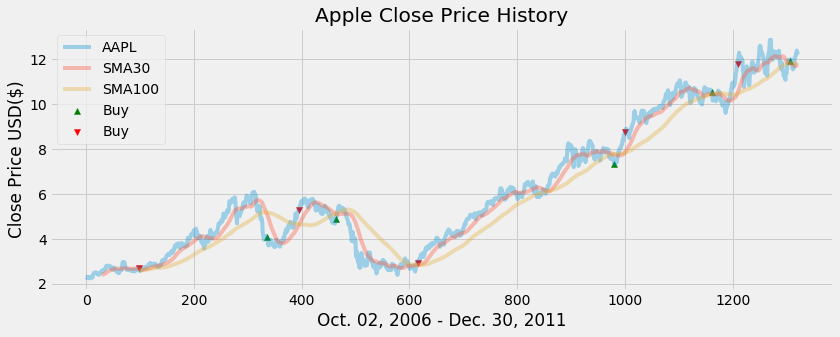

In [53]:
#Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Close'],label='AAPL',alpha=0.35)
plt.plot(SMA30['Close Price'],label='SMA30', alpha=0.35)
plt.plot(SMA100['Close Price'],label='SMA100', alpha=0.35)
plt.scatter(data.index,data['Buy_signal_price'],label='Buy',marker='^',color='Green')
plt.scatter(data.index,data['Sell_signal_price'],label='Buy',marker='v',color='red')
plt.title('Apple Close Price History')
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()